In [130]:
#import all required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [131]:
#Reading the loans' data file
df=pd.read_csv('loan.csv',low_memory=False)

In [24]:
#Display top 5 rows from dataframe
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,...,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [132]:
#Showcase data shape
df.shape

(39717, 111)

In [ ]:
#Observation1: There are 39,717 records with 111 cloumns

In [133]:
#Identifying total number of null values across all cloumns
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [9]:
#Observation2: There are many columns with all Null Values
#Action: Remove Columns with all Null Values

In [134]:
#Remvoing columns with Null Values
df = df.dropna(axis=1)
df.shape

(39717, 43)

In [ ]:
#Result: There were 68 Null columns and all have been successfully removed

In [135]:
#Display refined dataframe with remaining 43 Columns
pd.set_option("display.max_columns", 43)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [136]:
#Observation3: There are records for current customers, that are not relevant for this analysis
#Action: Remove all records with loan_status = "Current"
df=df[df.loan_status!="Current"]

# Get the unique values of loan_status column
df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [221]:
#Result: All records with loan_status == 'Current' have been removed
df.shape

(38577, 45)

In [137]:
#Observation4: There is '%' symbol in int_rate column
#Action: Remove '%' symbol from int_rate column & convert to integers
df.int_rate=pd.to_numeric(df.int_rate.str.strip("%"))
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0


In [ ]:
#Result: There is '%' symbol in int_rate column

In [138]:
#Observation4: issue_d column format is MMM-YY
#Action: Change issue_d column format to YYYY-MM-DD
df.issue_d=pd.to_datetime(df.issue_d, format='%b-%y')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0


In [ ]:
#Result: issue_d column has been successfully changed to YYYY-MM-DD

In [139]:
#Observation5: sub_grade column can be analysed better by removing Grade annotations
#Action: Strip Grade annotations from sub_grade column & change its format to numeric

df.sub_grade = pd.to_numeric(df.sub_grade.apply(lambda x : x[-1]))
df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

In [140]:
#Result: sub_grade column has been successfully changed
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0


In [ ]:
## Generting Derived Columns basis exisiting information
#1. Create 3 columns from issue_d i.e. loan_issue_year, loan_issue_month

In [142]:
df['loan_issue_year']=pd.DatetimeIndex(df['issue_d']).year
df['loan_issue_month']=pd.DatetimeIndex(df['issue_d']).month
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,...,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt,loan_issue_year,loan_issue_month
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,...,3,0,13648,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0,2011,12
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,...,3,0,1687,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0,2011,12
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,...,2,0,2956,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0,2011,12
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,...,10,0,5598,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0,2011,12
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,852xx,AZ,11.20,...,9,0,7963,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,1,INDIVIDUAL,0,0,2011,12


In [41]:
#Result: 2 new Derived columns added in Dataframe

In [ ]:
## BEGINING OF ANALYSIS ###

C:\Users\2087\Anaconda3_AIML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


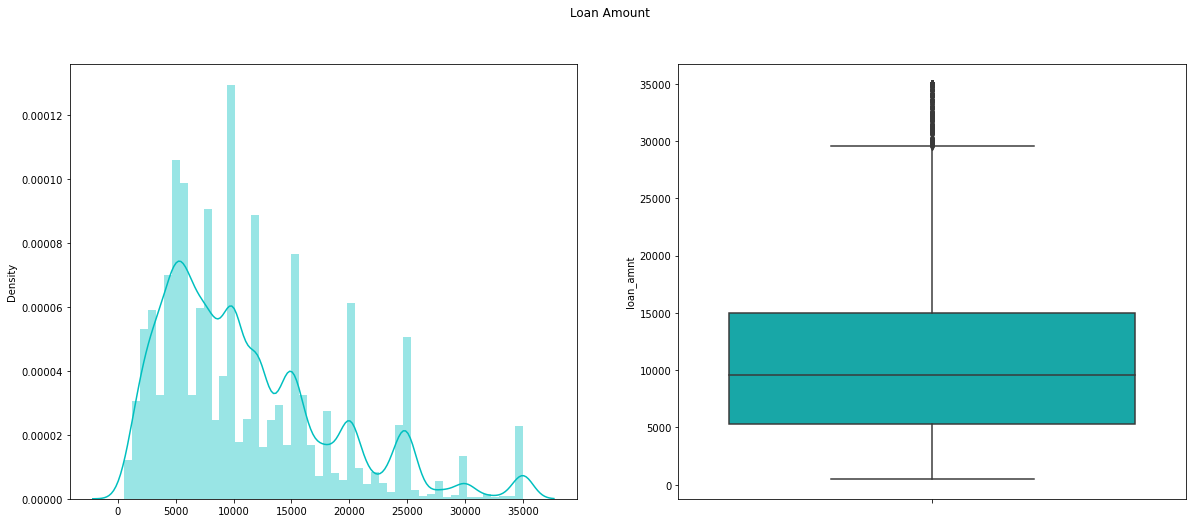

In [200]:
#Univariate Analysis on Loan Amount

#Setting figure size
plt.figure(figsize=(20,8))

#Draw Distribution Graph
plt.subplot(1,2,1)
sbn.distplot(x=df.loan_amnt,color="c") 

#Draw Box Graph
plt.subplot(1,2,2)
sbn.boxplot(y=df.loan_amnt,color="c")

plt.suptitle("Loan Amount")
plt.show()

In [46]:
#Inferences: 
# Mode = Median = 10000
# 50% Population has applied for loans between 5000 and 15000
# There are very few applicants beyond loan amount 30000

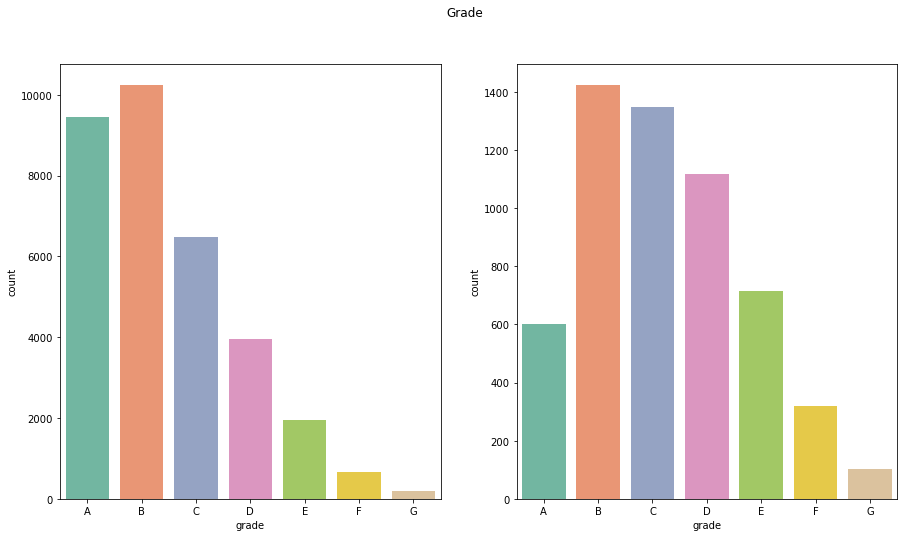

In [189]:
#Univariate Analysis on grade
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sbn.countplot(x = 'grade',order = ['A','B','C','D','E','F','G'],data = df[df.loan_status == 'Fully Paid'],palette = "Set2")

plt.subplot(1,2,2)
sbn.countplot(x = 'grade',order = ['A','B','C','D','E','F','G'],data = df[df.loan_status == 'Charged Off'],palette = "Set2")

plt.suptitle("Grade")
plt.show()

In [ ]:
#Inferences: 
# Paid to Default ratio is increasing from Group A to G
# Grade A Paid to Default ratio is appx 15:1 i.e. on every 15 fully paid customers there will be 1 default
# Grade B Paid to Default ratio is appx 7:1 i.e. on every 7 fully paid customers there will be 1 default
# Therefore, paid to Default ratio keeps decreasing and for Grade G its appx. 1:2 i.e. every other customer defaults

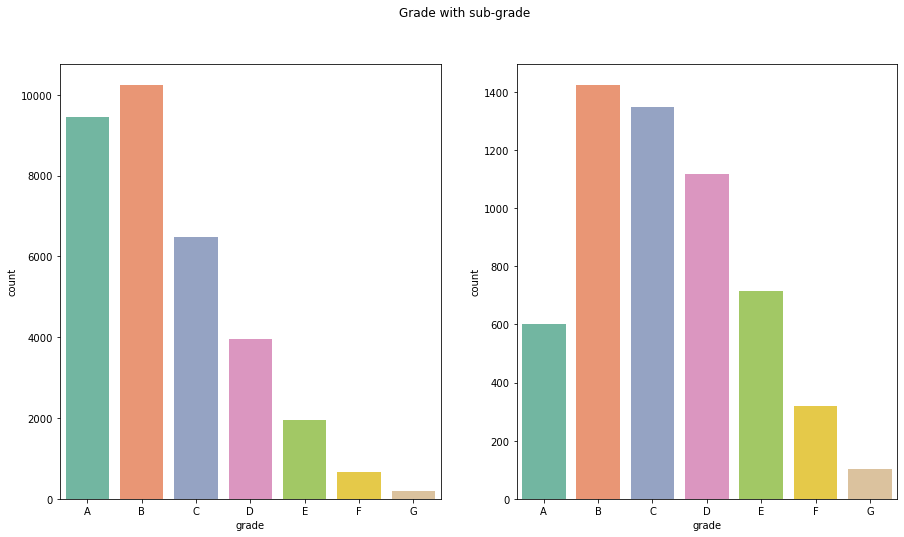

In [190]:
#Univariate Analysis on Sub-grade
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sbn.countplot(x = 'grade',order = ['A','B','C','D','E','F','G'],data = df[df.loan_status == 'Fully Paid'],palette = "Set2")

plt.subplot(1,2,2)
sbn.countplot(x = 'grade',order = ['A','B','C','D','E','F','G'],data = df[df.loan_status == 'Charged Off'],palette = "Set2")
plt.suptitle("Grade with sub-grade")
plt.show()

In [ ]:
#Inferences: 
# Paid to Default ratio is decreasing across Sub Grades, within Grades
# Sub Grade A1 is outlier where Paid to Defaut ratio is 44:1 to that of overall group that hovers around 15:1
# For all other groups all sub Grade's ratio hover around their respective overall grade ratio

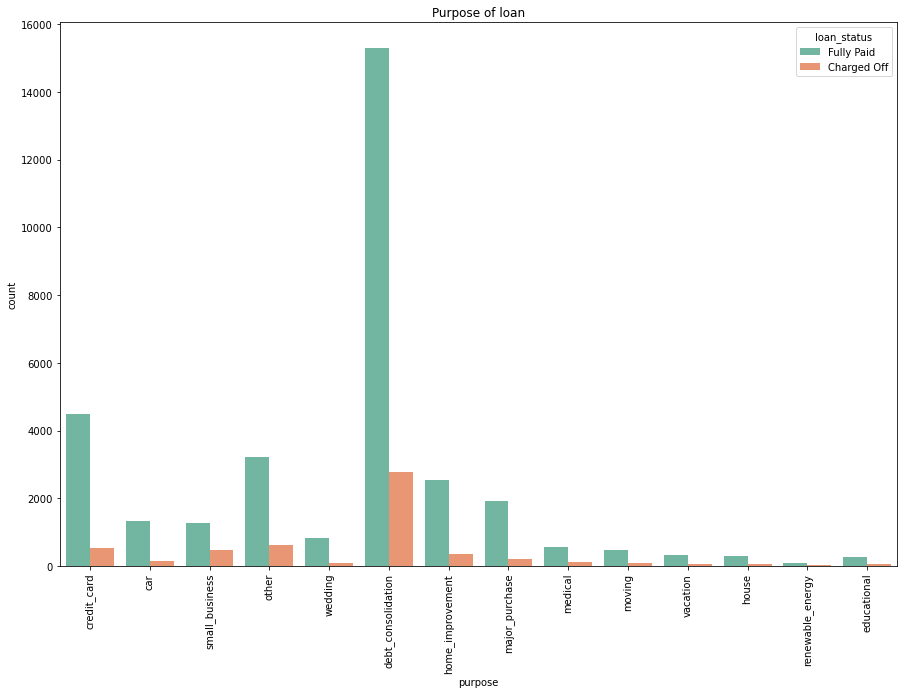

In [192]:
#Univariate analyses on Purpose column
plt.figure(figsize=(15,10))
sbn.countplot(x = 'purpose',hue=df.loan_status, data = df,palette='Set2')
plt.xticks(rotation=90)

plt.title("Purpose of loan")
plt.show()

In [ ]:
#Inferences: 
#Ratio of Paid to Default is lower for purposes such as Debt Consolidation, small businesses, & Others is appx 5:1
#Ratio of Paid to Default is higher for purposes such as major Purchase & Cars 

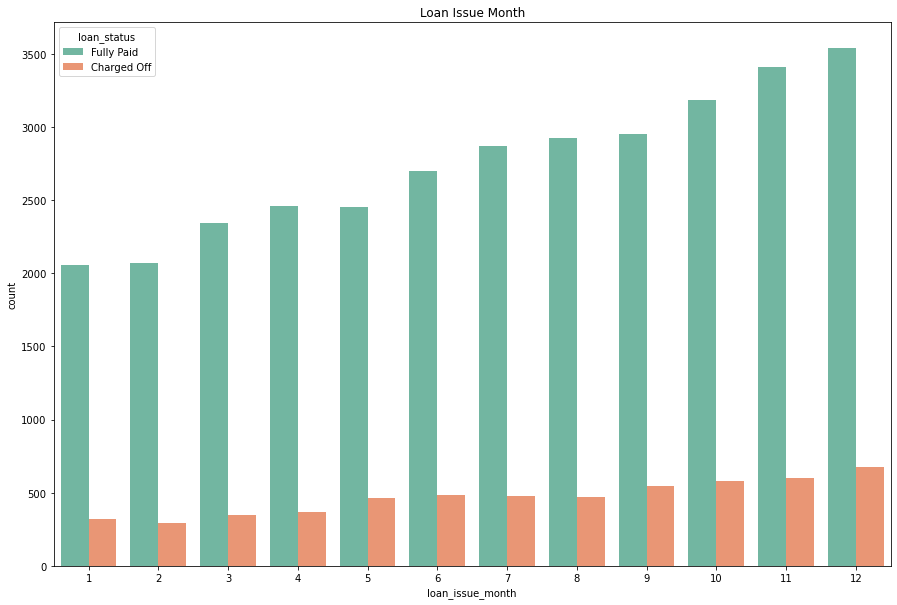

In [193]:
# Uivariate analysis on loan Month column
plt.figure(figsize=(15,10))
sbn.countplot(x='loan_issue_month',hue = 'loan_status',data=df,palette='Set2')
plt.title("Loan Issue Month")
plt.show()

In [ ]:
#Inferences: 
#Loan distribution increases steadily from January to December
#Ratio of Paid to Default is minimum between May to October months i.e. 1:6
#Ratio of Paid to Default is maximum between Feb to April months i.e. 1:8

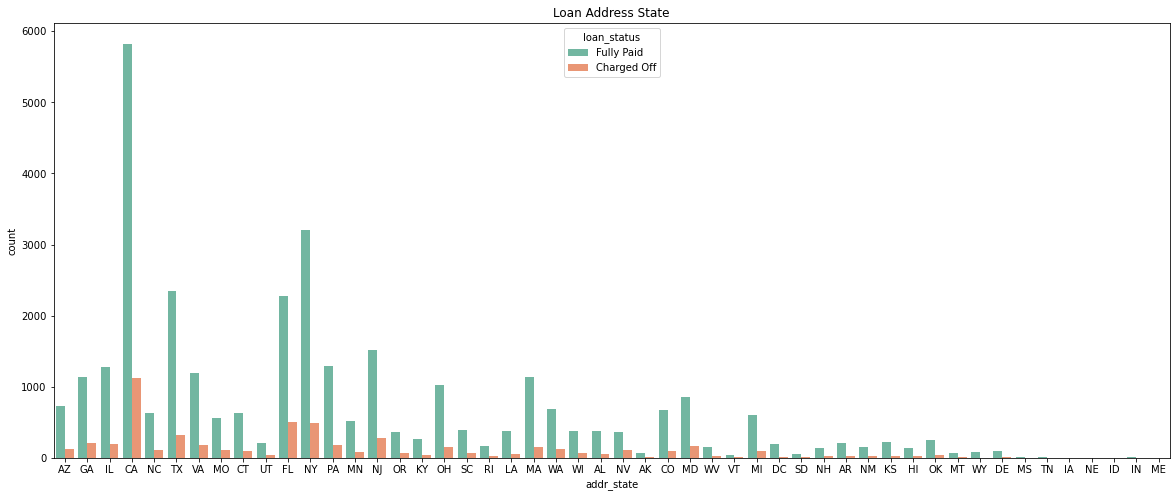

In [195]:
# Uivariate analysis on Address State Column
plt.figure(figsize=(20,8))
sbn.countplot(x='addr_state',hue = 'loan_status',data=df,palette='Set2')
plt.title("Loan Address State")
plt.show()

In [ ]:
#Inferences: 
#Maximum loan disbursement is for CA state and its Paid to Default ratio is appx. 1:6
#Paid to Default ratio for TX is appx. 1:8, for GA its 1:11 and for IL & MA its appx 1:12

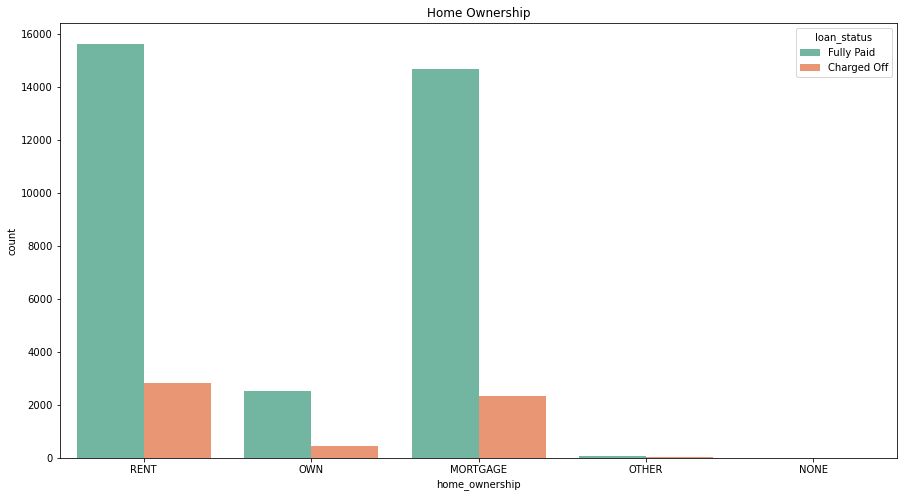

In [211]:
# Uivariate analysis on Home Ownership Column
plt.figure(figsize=(15,8))
sbn.countplot(x='home_ownership',hue = 'loan_status',data=df,palette='Set2')
plt.title("Home Ownership")
plt.show()

In [ ]:
#Inferences: 
#Maximum debtors Rent their houses, Paid to Default ratio for such debtors is appx. 1:5, which is almost same for Mortgage
#Paid to Default ratio for such home owners is 1:21

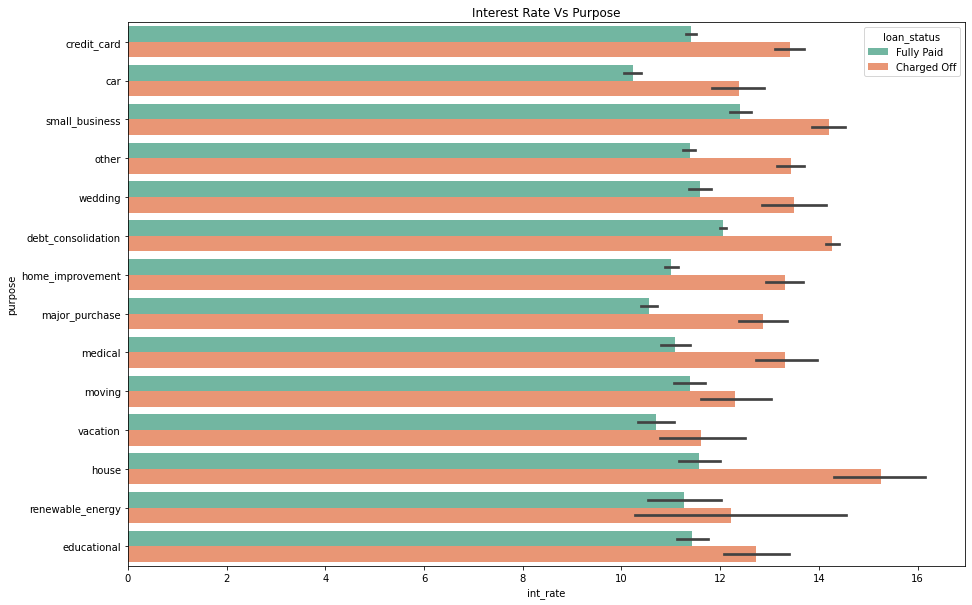

In [198]:
# Bi-variate analysis on loan interest rate and loan Purpose
plt.figure(figsize=(15,10))
sbn.barplot(x='int_rate',y="purpose", hue ='loan_status',data=df,palette='Set2')
plt.title("Interest Rate Vs Purpose")
plt.show()

In [ ]:
#Inferences: 
#People with loan purpose house default the most with interest rates between 14% to 16%

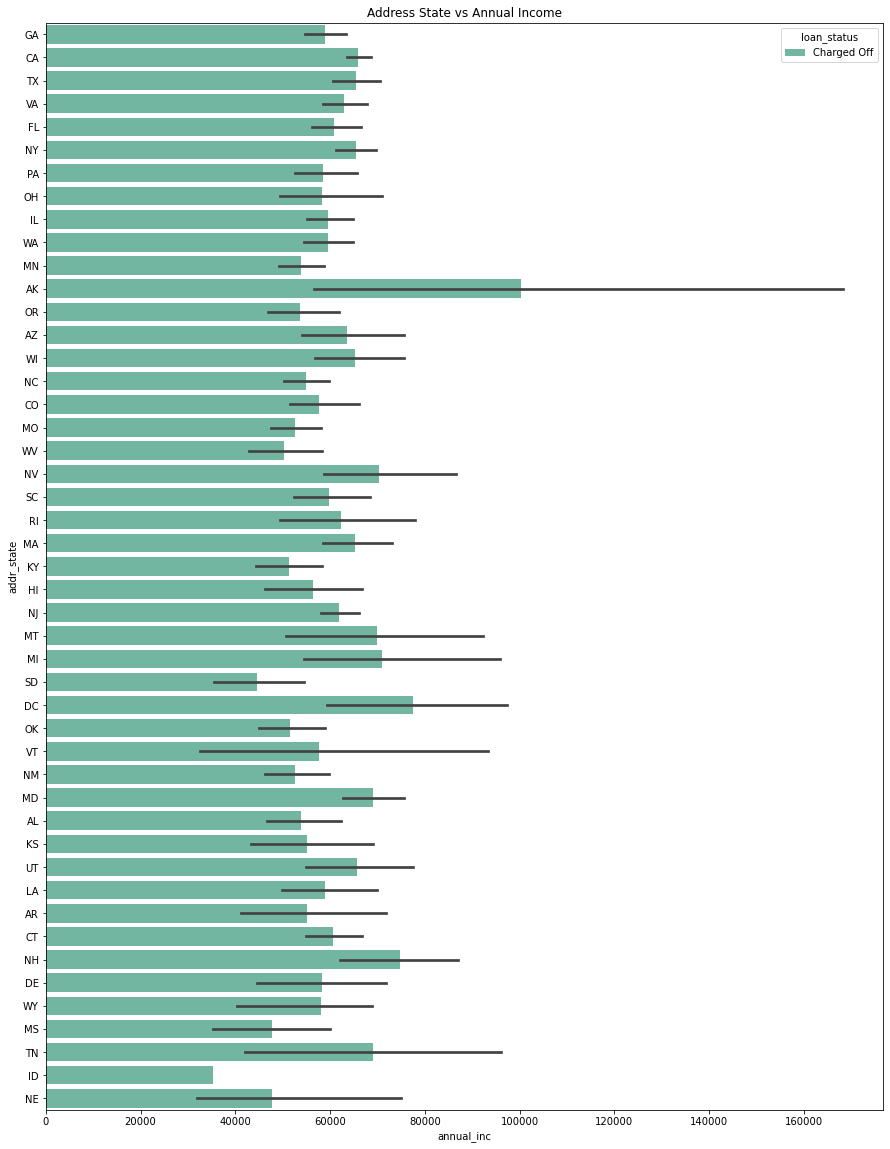

In [203]:
# Bi-variate analysis on Address State and Annual Income
plt.figure(figsize=(15,20))
sbn.barplot(x='annual_inc',y='addr_state', hue ='loan_status',data=df[df.loan_status=='Charged Off'],palette='Set2')
plt.title("Address State vs Annual Income")
plt.show()

In [ ]:
#Inferences: 
#People in AK and salary ranges between 60k and 160k, have tendency to default the most

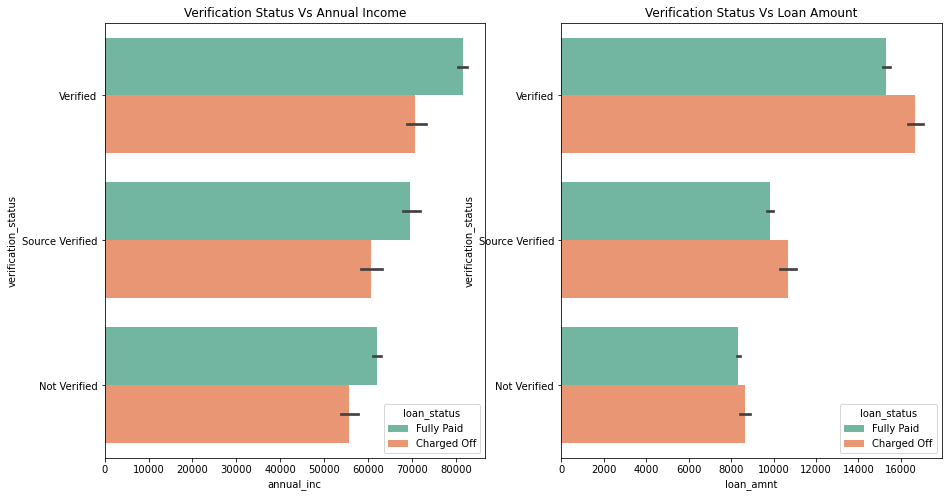

In [219]:
# Bi-variate analysis on
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sbn.barplot(x='annual_inc',y="verification_status", hue ='loan_status',data=df,palette='Set2')
plt.title("Verification Status Vs Annual Income")

plt.subplot(1,2,2)
sbn.barplot(x='loan_amnt',y="verification_status", hue ='loan_status',data=df,palette='Set2')
plt.title("Verification Status Vs Loan Amount")

plt.show()

In [ ]:
#Inferences: 
#People with verified status and annual income between 68k and 72k, tend to default more
#People with verified status and loan amount > 16000, tend to default more

In [ ]:
#----------------------#
#Final Recommendations#
#----------------------#

#As per above analysis, accounts with following features tend to default more :

#Loan given to people in Grade G.
#Purpose of loan is Debt Consolidation, small businesses, or Others 
#Loan distribution month is between May to October
#Loan distribution address state is CA
#Debtors are Renting their home property
#loan purpose is house and interest rates between 14% to 16%
#Address state is AK and salary Annual Income between 60k to 175k
#People with verified status, having annual income between 68k & 72K, and loan amount > 16000 